In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
import h5py
from tqdm import tqdm
import time
import sys
sys.path.append("..")
sys.path.append("../development")
from RPLB_acc_NoSTC import RPLB_acc_NoSTC
from RPLB_acc_NoSTC_arbitrary_analytical import RPLB_acc_NoSTC_arbitrary_analytical
from RPLB_acc_NoSTC_arbitrary import RPLB_acc_NoSTC_arbitrary
from RPLB_acc_NoSTC_arbitrary_alsointensity import RPLB_acc_NoSTC_arbitrary_alsointensity

#from RPLB_acc_anySTC import RPLB_acc_anySTC
#from RPLB_acc_anySTC_arbitrary import RPLB_acc_anySTC_arbitrary

In [2]:
# initialize constants (SI units)
c = 2.99792458e8 #speed of light
m_e = 9.10938356e-31
q_e = 1.60217662e-19
e_0 = 8.85418782e-12
# set pure spectral properties
lambda_0 = 800e-9  # central wavelength
omega_0 = 2*np.pi*c/lambda_0
k_0 = omega_0/c
tau_0 = 10e-15  # FL pulse duration 1/e2 intensity half-width (same def as beam waist)
a = 125/k_0
w_0 = np.sqrt(2)*np.sqrt(np.sqrt(1+(a*k_0)**2)-1)/k_0
print(w_0)
print(np.sqrt(2*a/k_0))
# calculate Rayleigh range
z_R = np.pi*w_0**2/lambda_0
# beam power
P = 6e12
# spectral phase
GDD = 0.0*(1e-15)**2
TOD = 0.0*(1e-15)**3
# intial electron velocity
beta_0 = 0
# set tuning parameters
t_0 = -10*tau_0
z_0 = 0.0
Psi_0 = 1.0*np.pi

axicon = 0.0
curv = 0.0
spher = 0.0
spher2 = 0.0

PM_1 = np.zeros(shape=(9))
PM_1[0] = Psi_0
PM_1[1] = axicon
PM_1[2] = curv
PM_1[3] = spher
PM_1[4] = spher2

PM_2 = np.zeros(shape=(5, 5))
PM_2[0,0] = Psi_0
PM_2[2,0] = GDD
PM_2[3,0] = TOD

SP = np.zeros(shape=(7))
SP[0] = 1.0

2.0051319796881284e-06
2.0131684841794813e-06


In [3]:
start = time.time()
time0, z0, beta0, KE0 = RPLB_acc_NoSTC(lambda_0, tau_0, w_0, P, Psi_0, GDD, t_0, z_0, beta_0)
middle = time.time()
time2, z2, beta2, KE2 = RPLB_acc_NoSTC_arbitrary(lambda_0, tau_0, a, P, PM_1, GDD, t_0, z_0, beta_0)
end = time.time()
#time3, z3, beta3, KE3 = RPLB_acc_anySTC(lambda_0, tau_0, w_0, P, Psi_0, np.array([0.0, 0.0]), np.array([0.0, 0.0]), np.array([0.0]), t_0, z_0, beta_0)
#time4, z4, beta4, KE4 = RPLB_acc_anySTC_arbitrary(lambda_0, tau_0, a, P, PM_2, t_0, z_0, beta_0)

time5, z5, beta5, KE5 = RPLB_acc_NoSTC_arbitrary_analytical(lambda_0, tau_0, a, P, Psi_0, GDD, t_0, z_0, beta_0, spher)

#time6, z6, beta6, KE6 = RPLB_acc_NoSTC_arbitrary_alsointensity(lambda_0, tau_0, a, P, SP, PM_1, GDD, t_0, z_0, beta_0)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1m[1mFailed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'erfc':[0m [1m[1mCannot determine Numba type of <class 'numpy.ufunc'>[0m
[1m
File "..\development\RPLB_acc_NoSTC_arbitrary_analytical.py", line 13:[0m
[1mdef call_erfc(x):
[1m    return erfc(x)
[0m    [1m^[0m[0m
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function call_erfc at 0x00000197A7D6DB20>))[0m
[0m[1mDuring: typing of call at C:\Users\spenc\Desktop\Code_repositories\RPLB-acc\testing\../development\RPLB_acc_NoSTC_arbitrary_analytical.py (55)
[0m
[0m[1mDuring: resolving callee type: type(CPUDispatcher(<function call_erfc at 0x00000197A7D6DB20>))[0m
[0m[1mDuring: typing of call at C:\Users\spenc\Desktop\Code_repositories\RPLB-acc\testing\../development\RPLB_acc_NoSTC_arbitrary_analytical.py (55)
[0m
[1m
File "..\development\RPLB_acc_NoSTC_arbitrary_analytical.py", line 55:[0m
[1mdef RPLB_acc_NoSTC_arbitrary_analytical(lambda_0, tau_0, a, P, Psi_0, phi_2, t_0, z_0, beta_0, spher):
    <source elided>
        const = (2*np.exp(-1j*k_0*z[k])/a)/(16*spher**(3/2))
[1m        E_z_spher = const*((1-1j)*np.sqrt(2*np.pi)*term*np.exp(1j*term**2/(4*spher))*call_erfc((term/2)*np.exp(1j*np.pi/4)*np.sqrt(1/(spher))) + 4*1j*np.sqrt(spher))
[0m        [1m^[0m[0m


In [ ]:
plt.plot(time0, KE0+0e6)
plt.plot(time2, KE2+1e6)
#plt.plot(time3, KE3+2e6)
#plt.plot(time4, KE4+3e6)
plt.plot(time5, KE5+4e6)
#plt.plot(time6, KE6+5e6)

In [5]:
print(middle-start)
print(end-middle)

5.446614027023315
10.197063207626343


In [8]:
SP = np.zeros(shape=(7))
SP[0] = 1.0
SP[1] = 0.1

time7, z7, beta7, KE7 = RPLB_acc_NoSTC_arbitrary_alsointensity(lambda_0, tau_0, a, P, SP, PM_1, GDD, t_0, z_0, beta_0)

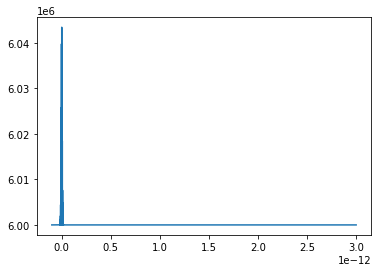

In [9]:
plt.plot(time7, KE7+6e6)

In [8]:
np.sum(SP**2)

1.0

In [9]:
np.where(SP)[0].max()

4

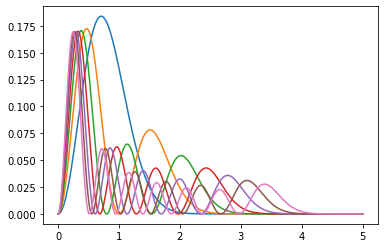

In [29]:
for i in range(0,7):
    SP = np.zeros(shape=(7))
    SP[i] = 1.0
    k0a0 = 1

    r = np.linspace(0, 5, 501)
    scaling = r*k0a0
    illum = scaling*np.exp(-scaling**2)
    spatial_profile = 1.0*SP[0] + \
                    (2 - 2*scaling**2)*SP[1]/np.sqrt(1+1) + \
                    (((2*scaling**2)**2 - 6*(2*scaling**2) + 6)/2)*SP[2]/np.sqrt(2+1) + \
                    ((-1*(2*scaling**2)**3 + 12*(2*scaling**2)**2 - 36*(2*scaling**2) + 24)/6)*SP[3]/np.sqrt(3+1) + \
                    (((2*scaling**2)**4 - 20*(2*scaling**2)**3 + 120*(2*scaling**2)**2 - 240*(2*scaling**2) + 120)/24)*SP[4]/np.sqrt(4+1) + \
                    ((-1*(2*scaling**2)**5 + 30*(2*scaling**2)**4 - 300*(2*scaling**2)**3 + 1200*(2*scaling**2)**2 - 1800*(2*scaling**2) + 720)/120)*SP[5]/np.sqrt(5+1) + \
                    (((2*scaling**2)**6 - 42*(2*scaling**2)**5 + 630*(2*scaling**2)**4 - 4200*(2*scaling**2)**3 + 12600*(2*scaling**2)**2 - 15120*(2*scaling**2) + 5040)/720)*SP[6]/np.sqrt(6+1)

    plt.plot(r, (illum*spatial_profile)**2)

(0.0, 2.0)

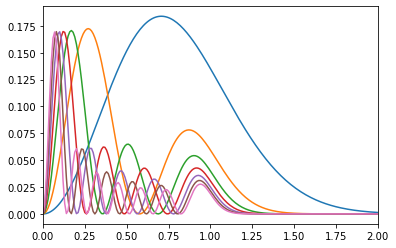

In [32]:
for i in range(0,7):
    SP = np.zeros(shape=(7))
    SP[i] = 1.0
    k0a = np.sqrt(2*np.where(SP)[0].max() + 1)

    r = np.linspace(0, 5, 501)
    scaling = r*k0a
    illum = scaling*np.exp(-scaling**2)
    spatial_profile = 1.0*SP[0] + \
                    (2 - 2*scaling**2)*SP[1]/np.sqrt(1+1) + \
                    (((2*scaling**2)**2 - 6*(2*scaling**2) + 6)/2)*SP[2]/np.sqrt(2+1) + \
                    ((-1*(2*scaling**2)**3 + 12*(2*scaling**2)**2 - 36*(2*scaling**2) + 24)/6)*SP[3]/np.sqrt(3+1) + \
                    (((2*scaling**2)**4 - 20*(2*scaling**2)**3 + 120*(2*scaling**2)**2 - 240*(2*scaling**2) + 120)/24)*SP[4]/np.sqrt(4+1) + \
                    ((-1*(2*scaling**2)**5 + 30*(2*scaling**2)**4 - 300*(2*scaling**2)**3 + 1200*(2*scaling**2)**2 - 1800*(2*scaling**2) + 720)/120)*SP[5]/np.sqrt(5+1) + \
                    (((2*scaling**2)**6 - 42*(2*scaling**2)**5 + 630*(2*scaling**2)**4 - 4200*(2*scaling**2)**3 + 12600*(2*scaling**2)**2 - 15120*(2*scaling**2) + 5040)/720)*SP[6]/np.sqrt(6+1)

    plt.plot(r, (illum*spatial_profile)**2)
plt.xlim(0,2)

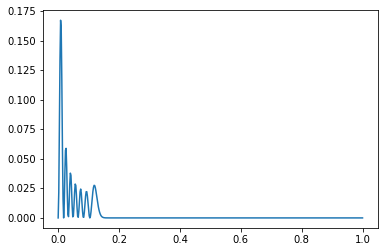

In [16]:
SP = np.zeros(shape=(7))
SP[6] = 1.0
k0a0 = 125
k0a = k0a0*(2*np.where(SP)[0].max() + 1)

alpha = np.linspace(0, 1.0, 501)
scaling = np.sqrt(2*k0a)*np.tan(alpha/2)
illum = scaling*np.exp(-scaling**2)
spatial_profile = 1.0*SP[0] + \
                (2 - 2*scaling**2)*SP[1]/np.sqrt(1+1) + \
                (((2*scaling**2)**2 - 6*(2*scaling**2) + 6)/2)*SP[2]/np.sqrt(2+1) + \
                ((-1*(2*scaling**2)**3 + 12*(2*scaling**2)**2 - 36*(2*scaling**2) + 24)/6)*SP[3]/np.sqrt(3+1) + \
                (((2*scaling**2)**4 - 20*(2*scaling**2)**3 + 120*(2*scaling**2)**2 - 240*(2*scaling**2) + 120)/24)*SP[4]/np.sqrt(4+1) + \
                ((-1*(2*scaling**2)**5 + 30*(2*scaling**2)**4 - 300*(2*scaling**2)**3 + 1200*(2*scaling**2)**2 - 1800*(2*scaling**2) + 720)/120)*SP[5]/np.sqrt(5+1) + \
                (((2*scaling**2)**6 - 42*(2*scaling**2)**5 + 630*(2*scaling**2)**4 - 4200*(2*scaling**2)**3 + 12600*(2*scaling**2)**2 - 15120*(2*scaling**2) + 5040)/720)*SP[6]/np.sqrt(6+1)

plt.plot(alpha, (illum*spatial_profile)**2)

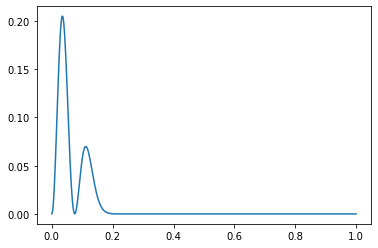

In [12]:
SP = np.array([0.1, 1, 0, 0, 0, 0, 0.0])
k0a0 = 125
k0a = k0a0*(2*np.where(SP)[0].max() + 1)

alpha = np.linspace(0, 1.0, 501)
scaling = np.sqrt(2*k0a)*np.tan(alpha/2)
illum = scaling*np.exp(-scaling**2)
spatial_profile = 1.0*SP[0] + \
                (2 - 2*scaling**2)*SP[1]/np.sqrt(1+1) + \
                (((2*scaling**2)**2 - 6*(2*scaling**2) + 6)/2)*SP[2]/np.sqrt(2+1) + \
                ((-1*(2*scaling**2)**3 + 12*(2*scaling**2)**2 - 36*(2*scaling**2) + 24)/6)*SP[3]/np.sqrt(3+1) + \
                (((2*scaling**2)**4 - 20*(2*scaling**2)**3 + 120*(2*scaling**2)**2 - 240*(2*scaling**2) + 120)/24)*SP[4]/np.sqrt(4+1) + \
                ((-1*(2*scaling**2)**5 + 30*(2*scaling**2)**4 - 300*(2*scaling**2)**3 + 1200*(2*scaling**2)**2 - 1800*(2*scaling**2) + 720)/120)*SP[5]/np.sqrt(5+1) + \
                (((2*scaling**2)**6 - 42*(2*scaling**2)**5 + 630*(2*scaling**2)**4 - 4200*(2*scaling**2)**3 + 12600*(2*scaling**2)**2 - 15120*(2*scaling**2) + 5040)/720)*SP[6]/np.sqrt(6+1)

plt.plot(alpha, (illum*spatial_profile)**2)